# License

    Copyright (C) 2015-2016, Andrew W. Steiner

    This is based on the excellent work by Dany Page at
    http://www.astroscu.unam.mx/neutrones/home.html

    This program is free software; you can redistribute it
    and/or modify it under the terms of the GNU General Public License
    as published by the Free Software Foundation; either version 3 of
    the License, or (at your option) any later version.

    This program is distributed in the hope that it will be
    useful, but WITHOUT ANY WARRANTY; without even the implied warranty
    of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
    General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see http://www.gnu.org/licenses/ .

## Perform imports:

In [4]:
import matplotlib.pyplot as plot
import numpy
from six.moves import urllib
import matplotlib.gridspec as gridspec
try:
    import o2sclpy
except ImportError:
    urllib.request.urlretrieve('http://raw.githubusercontent.com/awsteiner/o2scl'+
         '/master/python/__init__.py','o2sclpy.py')
    try:
        import o2sclpy
    except:
        raise ImportError('Could not import o2sclpy, even after download.')
        
from load_crust import load_crust
print('Success.')

Success.


## Read crust data

In [5]:
lc=load_crust()
lc.load()

('Loaded', 100000, 'nucleons.')
('Loaded', 1188, 'nuclei for inner crust.')
('Loaded', 1200, 'nuclei for outer crust.')


In [7]:
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str
print(latex_float(1.099))

1.1


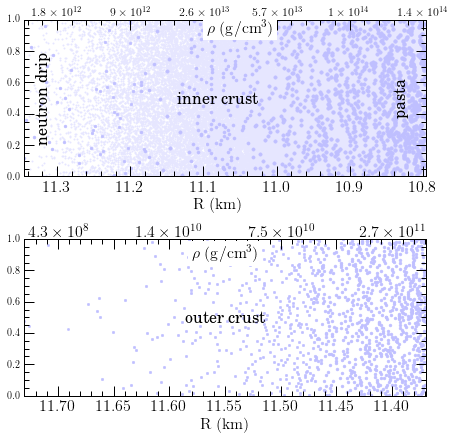

In [13]:
plot.rc('text',usetex=True)
plot.rc('font',family='serif')
plot.rcParams['lines.linewidth']=0.5

fig=plot.figure(figsize=(6.0,6.0))
fig.set_facecolor('white')

gs1=gridspec.GridSpec(2,1)
ax1=fig.add_subplot(gs1[0])
ax2=fig.add_subplot(gs1[1])
gs1.update(hspace=0.4,left=0.01,bottom=0.08,right=0.94,top=0.95)

ax1.minorticks_on()
ax1.tick_params('both',length=10,width=1,which='major')
ax1.tick_params('both',length=5,width=1,which='minor')

ax2.minorticks_on()
ax2.tick_params('both',length=10,width=1,which='major')
ax2.tick_params('both',length=5,width=1,which='minor')


ax1.set_xlim([numpy.max(lc.r_nnuc),numpy.min(lc.r_nnuc)])
ax1.plot(lc.r_nn,lc.w_nn,marker='o',lw=0,mfc=(0.9,0.9,1.0),
          mec=(0.9,0.9,1.0),mew=0.0,ms=2.0)
for i in range(0,len(lc.r_nnuc)):
    ax1.plot(lc.r_nnuc[i],lc.w_nnuc[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=lc.Rn_nnuc[i])
ax1.text(11.05,0.95,r'$\rho~(\mathrm{g}/\mathrm{cm}^3)$',fontsize=16,
          va='center',ha='center',
          bbox=dict(facecolor='white',lw=0))
ax1.text(10.8,1.05,latex_float(lc.rho_108),fontsize=12,
          va='center',ha='center')
ax1.text(10.9,1.05,latex_float(lc.rho_109),fontsize=12,
          va='center',ha='center')
ax1.text(11.0,1.05,latex_float(lc.rho_110),fontsize=12,
          va='center',ha='center')
ax1.text(11.1,1.05,latex_float(lc.rho_111),fontsize=12,
          va='center',ha='center')
ax1.text(11.2,1.05,latex_float(lc.rho_112),fontsize=12,
          va='center',ha='center')
ax1.text(11.3,1.05,latex_float(lc.rho_113),fontsize=12,
          va='center',ha='center')
ax1.text(10.83,0.5,'pasta',fontsize=16,
          rotation=90,va='center',ha='center')
ax1.text(11.32,0.5,'neutron drip',fontsize=16,
          rotation=90,va='center',ha='center')
ax1.text(11.08,0.5,'inner crust',fontsize=16,
          va='center',ha='center')
for label in ax1.get_xticklabels():
    label.set_fontsize(16)
ax1.text(11.08,-0.18,'$\mathrm{R~(km)}$',fontsize=16,
          va='center',ha='center')
    
ax2.set_xlim([numpy.max(lc.r_nnuc_outer),numpy.min(lc.r_nnuc_outer)])
for i in range(0,len(lc.r_nnuc_outer)):
    ax2.plot(lc.r_nnuc_outer[i],lc.w_nnuc_outer[i],
              marker='.',lw=0,mfc=(0.75,0.75,1.0),mec=(0.75,0.75,1.0),
              ms=lc.Rn_nnuc_outer[i])
for label in ax2.get_xticklabels():
    label.set_fontsize(16)
    
ax2.text(11.4,1.05,latex_float(lc.rho_114),fontsize=16,
          va='center',ha='center')
ax2.text(11.5,1.05,latex_float(lc.rho_115),fontsize=16,
          va='center',ha='center')
ax2.text(11.6,1.05,latex_float(lc.rho_116),fontsize=16,
          va='center',ha='center')
ax2.text(11.7,1.05,latex_float(lc.rho_117),fontsize=16,
          va='center',ha='center')
ax2.text(11.55,0.5,'outer crust',fontsize=16,
          va='center',ha='center')
ax2.text(11.55,-0.18,'$\mathrm{R~(km)}$',fontsize=16,
          va='center',ha='center')
ax2.text(11.55,0.91,r'$\rho~(\mathrm{g}/\mathrm{cm}^3)$',fontsize=16,
          va='center',ha='center',
          bbox=dict(facecolor='white',lw=0))

plot.savefig('crust_plot2.png')
plot.show()